# TALENT Course 11
## Learning from Data: Bayesian Methods and Machine Learning
### York, UK, June 10-28, 2019 

# Why Bayes is Better (I)

### Import of modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import special

# Not really needed, but nicer plots
import seaborn as sns
sns.set()
sns.set_context("talk")

## Quotes from one pioneering and one renaissance Bayesian authority
> *"Probability theory is nothing but common sense reduced to calculation."*
(Laplace)

> *"Bayesian inference probabilities are a measure of our state of knowledge about nature, not a measure of nature itself."*
(Sivia)

## Advantages of the Bayesian approach

1. Provides an elegantly simple and rational approach for answering, in an optimal way, any scientific question for a given state of information. This contrasts to the recipe or cookbook approach of conventional statistical analysis. The procedure is well-defined:
  - Clearly state your question and prior information.
  - Apply the sum and product rules. The starting point is always Bayes’ theorem.
    
  For some problems, a Bayesian analysis may simply lead to a familiar statistic. Even in this situation it often provides a powerful new insight concerning the interpretation of the statistic.

2. Incorporates relevant prior (e.g., known signal model or known theory model expansion) information through Bayes’ theorem. This is one of the great strengths of Bayesian analysis. 
  - For data with a small signal-to-noise ratio, a Bayesian analysis can frequently yield many orders of magnitude improvement in model parameter estimation, through the incorporation of relevant prior information about the signal model.
  - For effective field theories, information about the expansion can be explicitly included and tested.

3. Provides a way of eliminating nuisance parameters through marginalization. For some problems, the marginalization can be performed analytically, permitting certain calculations to become computationally tractable.

4. Provides a way for incorporating the effects of systematic errors arising from both the measurement operation and theoretical model predictions.

5. Calculates probability of hypothesis directly: $p(H_i|D, I)$.

6. Provides a more powerful way of assessing competing theories at the forefront of science by automatically quantifying Occam’s razor. 
 
 The Bayesian quantitative Occam’s razor can also save a lot of time that might otherwise be spent chasing noise artifacts that masquerade as possible detections of real phenomena. 

### Occam's razor
Occam’s razor is a principle attributed to the medieval philosopher William of Occam (or Ockham). The principle states that one should not make more assumptions than the minimum needed. It underlies all scientific modeling and theory building. It cautions us to choose from a set of otherwise equivalent models of a given phenomenon the simplest one. In any given model, Occam’s razor helps us to "shave off" those variables that are not really needed to explain the phenomenon. It was previously thought to be only a qualitative principle. 
![leprechaun](https://upload.wikimedia.org/wikipedia/commons/5/55/Leprechaun_or_Clurichaun.png)

## Nuisance parameters (I)
[A Bayesian Billiard game](bayesTALENT_billiard.ipynb)

## Nuisance parameters (II)
[Finding the slope of a straight line (part II)](parameter_estimation_fitting_straight_line_II.ipynb)

## Error propagation: marginalization
[Example: Propagation of systematic errors](parameter_estimation_fitting_straight_line_II.ipynb#error_propagation)

## Error propagation: prior information

### Example 3.6.2 in Sivia
Consider $A = f^2$ problem where $A = A_0 \pm \sigma_A$.

What is $f = f_0 \pm \sigma_f$?

In [10]:
def A_posterior(A,A0,sigA):
    pA = np.exp(-(A-A0)**2/(2*sigA**2))
    return pA/np.max(pA)

# Wrong analysis
def f_likelihood(f,A0,sigA):
    sigf = sigA / (2*np.sqrt(A0))
    pf = np.exp(-(f-np.sqrt(A0))**2/(2*sigf**2))
    return pf/np.max(pf)

# Correct error propagation
def f_posterior(f,A0,sigA):
    pf = f*np.exp(-(f**2-A0)**2/(2*sigA**2))
    return pf/np.max(pf)

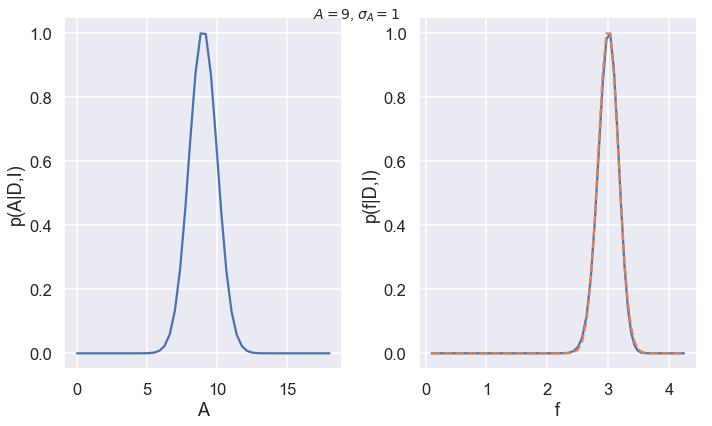

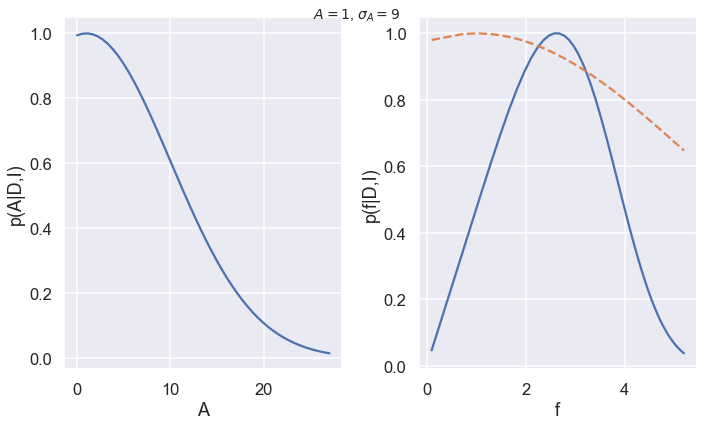

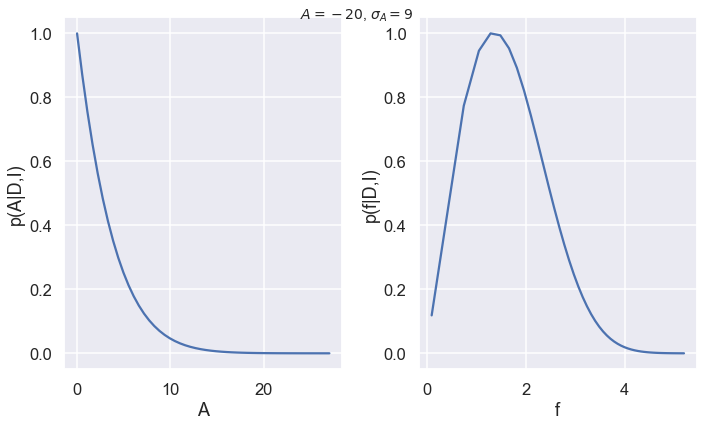

In [28]:
for (A0,sigA) in [(9,1),(1,9),(-20,9)]:
    maxA = max(2*A0,3*sigA)
    A_arr = np.linspace(0.01,maxA)
    f_arr = np.sqrt(A_arr)
    fig,ax=plt.subplots(1,2,figsize=(10,6))
    ax[0].plot(A_arr,A_posterior(A_arr,A0,sigA))
    ax[1].plot(f_arr,f_posterior(f_arr,A0,sigA))
    if A0>0:
        ax[1].plot(f_arr,f_likelihood(f_arr,A0,sigA),'--')
    fig.suptitle(f'$A={A0}$, $\sigma_A={sigA}$',fontsize=16)
    ax[0].set(xlabel='A',ylabel='p(A|D,I)')
    ax[1].set(xlabel='f',ylabel='p(f|D,I)')
    plt.tight_layout()
    fig.suptitle(f'$A={A0}$, $\sigma_A={sigA}$',fontsize=14)
